In [1]:
pwd()

'C:\\Users\\rp2815'

In [1]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier  #RF algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Performing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

train = pd.read_csv('F:\second_term\ADS\proj3\Train.csv')
test = pd.read_csv('F:\second_term\ADS\proj3\Test.csv')
target = 'y' #this is y
IDcol = 'ID'

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#Functions for building the model
def modelfit(alg, dtrain, dtest, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['y'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    dtest_predictions = alg.predict(dtest[predictors])
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['y'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy(train): %.4g" % metrics.accuracy_score(dtrain['y'].values, dtrain_predictions))
    print ("Accuracy(test) : %.4g" % metrics.accuracy_score(dtest['y'].values, dtest_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['y'], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')



Model Report
Accuracy(train): 0.7106
Accuracy(test) : 0.6725
AUC Score (Train): 0.779231
CV Score : Mean - 0.7204459 | Std - 0.01785455 | Min - 0.7061719 | Max - 0.7555124


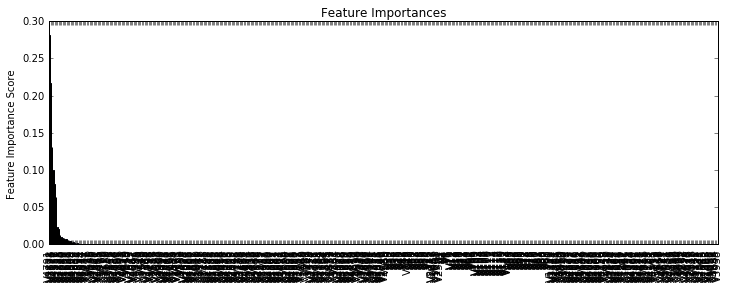

In [27]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
#initial estimates:
#min_samples_split = 200 : This should be ~0.5-1% of total values.
#min_samples_leaf = 50 : Can be selected based on intuition. This is just used for preventing overfitting and again a small value because of imbalanced classes.
#max_depth = 1 : for decision stump
#max_features = ‘sqrt’ : Its a general thumb-rule to start with square root.
#subsample = 0.8 : This is a commonly-used start value
#n_estimators=100 : Can be selected based on intuition.
#max_features= "sqrt": typical sqrt to 30-40% of total features

#This is the untuned baseline, the parameters are not necesarily the best.
rf0 = RandomForestClassifier(random_state=100,
                             n_estimators=50, max_depth=2, 
                             min_samples_split=50, min_samples_leaf=20, 
                            min_weight_fraction_leaf=0.0, max_features=200, 
                             max_leaf_nodes=None,  bootstrap=False, oob_score=False, n_jobs=1, 
                              verbose=0, warm_start=False, class_weight="balanced")
modelfit(rf0, train,test, predictors)#train : 71% test: 67.25%


Model Report
Accuracy(train): 0.7681
Accuracy(test) : 0.7075
AUC Score (Train): 0.862100
CV Score : Mean - 0.7706992 | Std - 0.02735012 | Min - 0.7246094 | Max - 0.8037267
max_feature: 1

Model Report
Accuracy(train): 0.8194
Accuracy(test) : 0.74
AUC Score (Train): 0.911033
CV Score : Mean - 0.7940656 | Std - 0.02766322 | Min - 0.7503906 | Max - 0.8255823
max_feature: 3

Model Report
Accuracy(train): 0.845
Accuracy(test) : 0.75
AUC Score (Train): 0.933750
CV Score : Mean - 0.8077352 | Std - 0.0173131 | Min - 0.7796094 | Max - 0.8288043
max_feature: 5

Model Report
Accuracy(train): 0.8556
Accuracy(test) : 0.755
AUC Score (Train): 0.940350
CV Score : Mean - 0.8085908 | Std - 0.02393374 | Min - 0.7726953 | Max - 0.8382812
max_feature: 7

Model Report
Accuracy(train): 0.8756
Accuracy(test) : 0.7375
AUC Score (Train): 0.952734
CV Score : Mean - 0.8138763 | Std - 0.02089011 | Min - 0.7816406 | Max - 0.8338898
max_feature: 9

Model Report
Accuracy(train): 0.8719
Accuracy(test) : 0.7525
AUC S

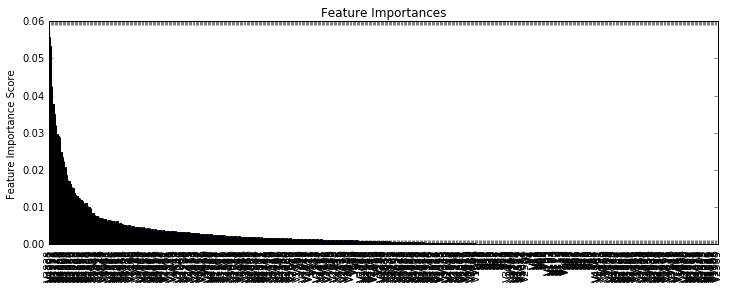

In [45]:
#inital value
#random_state=100,
#n_estimators=50, max_depth=7, 
#min_samples_split=50, min_samples_leaf=20, 
#min_weight_fraction_leaf=0.0, max_features=20
for a in range(1,30,2):
    rf0 = RandomForestClassifier(random_state=100,
                             n_estimators=50, max_depth=7, 
                             min_samples_split=50, min_samples_leaf=20, 
                            min_weight_fraction_leaf=0.0, max_features=a, 
                             max_leaf_nodes=None,  bootstrap=False, oob_score=False, n_jobs=1, 
                              verbose=0, warm_start=False, class_weight="balanced")
    modelfit(rf0, train,test, predictors)#train : 88% test: 72%
    print ("max_feature: %.1g" % a)
#max_feature = 17

ERROR! Session/line number was not unique in database. History logging moved to new session 115

Model Report
Accuracy(train): 0.7137
Accuracy(test) : 0.7075
AUC Score (Train): 0.783936
CV Score : Mean - 0.7486028 | Std - 0.02125209 | Min - 0.7235547 | Max - 0.7792578
depth: 1

Model Report
Accuracy(train): 0.7562
Accuracy(test) : 0.7075
AUC Score (Train): 0.835912
CV Score : Mean - 0.7706939 | Std - 0.01754162 | Min - 0.7453125 | Max - 0.7937891
depth: 2

Model Report
Accuracy(train): 0.7913
Accuracy(test) : 0.7175
AUC Score (Train): 0.874333
CV Score : Mean - 0.7859674 | Std - 0.0164333 | Min - 0.7565234 | Max - 0.8029297
depth: 3

Model Report
Accuracy(train): 0.8081
Accuracy(test) : 0.7375
AUC Score (Train): 0.906275
CV Score : Mean - 0.7985446 | Std - 0.01723515 | Min - 0.77 | Max - 0.8168359
depth: 4

Model Report
Accuracy(train): 0.8475
Accuracy(test) : 0.7325
AUC Score (Train): 0.929342
CV Score : Mean - 0.8051457 | Std - 0.01916314 | Min - 0.7770703 | Max - 0.8274219
depth: 5


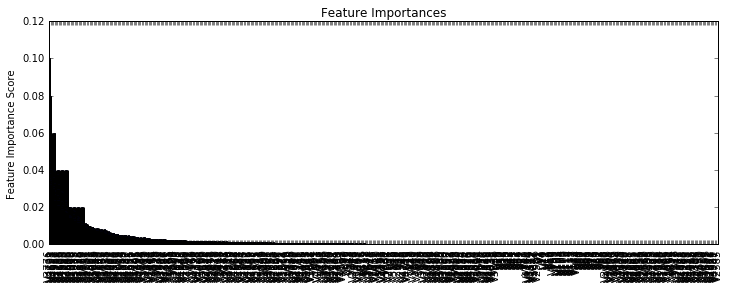

In [46]:
#inital value
#random_state=100,
#n_estimators=50, max_depth=7, 
#min_samples_split=50, min_samples_leaf=20, 
#min_weight_fraction_leaf=0.0, max_features=20
for a in range(1,10):
    rf0 = RandomForestClassifier(random_state=100,
                             n_estimators=50, max_depth=a, 
                             min_samples_split=50, min_samples_leaf=20, 
                            min_weight_fraction_leaf=0.0, max_features=17, 
                             max_leaf_nodes=None,  bootstrap=False, oob_score=False, n_jobs=1, 
                              verbose=0, warm_start=False, class_weight="balanced")
    modelfit(rf0, train,test, predictors)#train : 80% test: 73.75%
    print ("depth: %.1g" % a)
#depth = 4


Model Report
Accuracy(train): 0.8063
Accuracy(test) : 0.72
AUC Score (Train): 0.906261
CV Score : Mean - 0.7995334 | Std - 0.01681137 | Min - 0.7711719 | Max - 0.8174219

Model Report
Accuracy(train): 0.8063
Accuracy(test) : 0.72
AUC Score (Train): 0.906261
CV Score : Mean - 0.7995334 | Std - 0.01681137 | Min - 0.7711719 | Max - 0.8174219

Model Report
Accuracy(train): 0.8063
Accuracy(test) : 0.72
AUC Score (Train): 0.906261
CV Score : Mean - 0.7995334 | Std - 0.01681137 | Min - 0.7711719 | Max - 0.8174219

Model Report
Accuracy(train): 0.8063
Accuracy(test) : 0.72
AUC Score (Train): 0.906261
CV Score : Mean - 0.7995334 | Std - 0.01681137 | Min - 0.7711719 | Max - 0.8174219

Model Report
Accuracy(train): 0.8081
Accuracy(test) : 0.7375
AUC Score (Train): 0.906275
CV Score : Mean - 0.7985446 | Std - 0.01723515 | Min - 0.77 | Max - 0.8168359

Model Report
Accuracy(train): 0.8125
Accuracy(test) : 0.725
AUC Score (Train): 0.905839
CV Score : Mean - 0.7993083 | Std - 0.01854332 | Min - 0.76

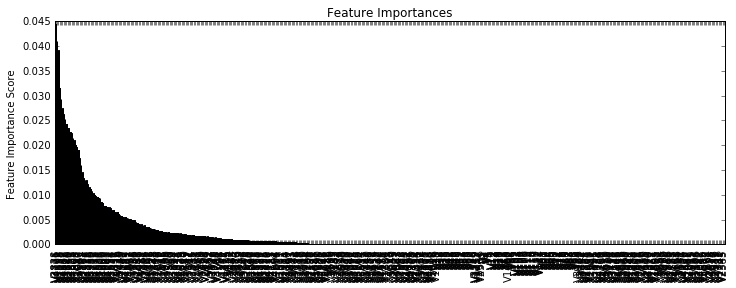

In [48]:
for b in range(10,90,10):
    rf0 = RandomForestClassifier(random_state=100,
                             n_estimators=50, max_depth=4, 
                             min_samples_split=b, min_samples_leaf=20, 
                            min_weight_fraction_leaf=0.0, max_features=17, 
                             max_leaf_nodes=None,  bootstrap=False, oob_score=False, n_jobs=1, 
                              verbose=0, warm_start=False, class_weight="balanced")
    modelfit(rf0, train,test, predictors)
#min_samples_split = 50


Model Report
Accuracy(train): 0.8081
Accuracy(test) : 0.7375
AUC Score (Train): 0.906275
CV Score : Mean - 0.7985446 | Std - 0.01723515 | Min - 0.77 | Max - 0.8168359

Model Report
Accuracy(train): 0.8069
Accuracy(test) : 0.7325
AUC Score (Train): 0.901323
CV Score : Mean - 0.7982245 | Std - 0.01897725 | Min - 0.7660156 | Max - 0.8165761

Model Report
Accuracy(train): 0.8037
Accuracy(test) : 0.73
AUC Score (Train): 0.894231
CV Score : Mean - 0.798739 | Std - 0.02157251 | Min - 0.7682813 | Max - 0.825854

Model Report
Accuracy(train): 0.8031
Accuracy(test) : 0.7375
AUC Score (Train): 0.889522
CV Score : Mean - 0.7981187 | Std - 0.02086531 | Min - 0.7673828 | Max - 0.8231641

Model Report
Accuracy(train): 0.8031
Accuracy(test) : 0.7275
AUC Score (Train): 0.882461
CV Score : Mean - 0.7968823 | Std - 0.02213811 | Min - 0.7635937 | Max - 0.8289453

Model Report
Accuracy(train): 0.7919
Accuracy(test) : 0.7325
AUC Score (Train): 0.878787
CV Score : Mean - 0.7981481 | Std - 0.02293473 | Min -

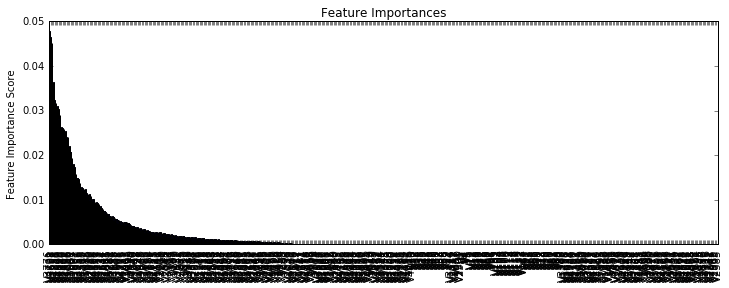

In [50]:
for c in range(20,100,10):
    rf0 = RandomForestClassifier(random_state=100,
                             n_estimators=50, max_depth=4, 
                             min_samples_split=50, min_samples_leaf=c, 
                            min_weight_fraction_leaf=0.0, max_features=17, 
                             max_leaf_nodes=None,  bootstrap=False, oob_score=False, n_jobs=1, 
                              verbose=0, warm_start=False, class_weight="balanced")
    modelfit(rf0, train,test, predictors)
#min_samples_leaf: 70


Model Report
Accuracy(train): 0.7937
Accuracy(test) : 0.7225
AUC Score (Train): 0.872386
CV Score : Mean - 0.7867742 | Std - 0.02413524 | Min - 0.7473437 | Max - 0.8148438

Model Report
Accuracy(train): 0.7975
Accuracy(test) : 0.72
AUC Score (Train): 0.872470
CV Score : Mean - 0.7885084 | Std - 0.02439396 | Min - 0.7480859 | Max - 0.8159375

Model Report
Accuracy(train): 0.7994
Accuracy(test) : 0.72
AUC Score (Train): 0.872923
CV Score : Mean - 0.7890348 | Std - 0.0250634 | Min - 0.7484766 | Max - 0.8175

Model Report
Accuracy(train): 0.795
Accuracy(test) : 0.725
AUC Score (Train): 0.873025
CV Score : Mean - 0.7885225 | Std - 0.02440068 | Min - 0.7488672 | Max - 0.8161328

Model Report
Accuracy(train): 0.7931
Accuracy(test) : 0.725
AUC Score (Train): 0.873025
CV Score : Mean - 0.7880818 | Std - 0.02403866 | Min - 0.7485547 | Max - 0.8155469

Model Report
Accuracy(train): 0.7919
Accuracy(test) : 0.7225
AUC Score (Train): 0.872275
CV Score : Mean - 0.7869008 | Std - 0.02415075 | Min - 0

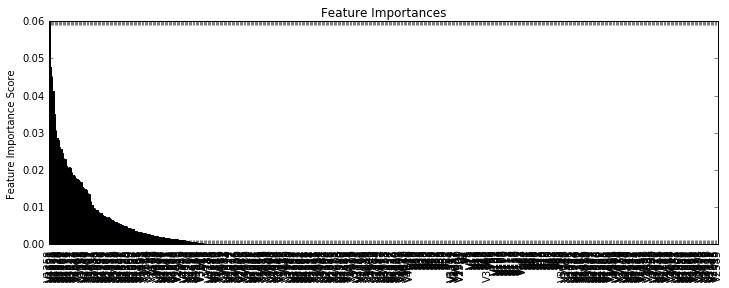

In [60]:
for d in range(35,45,1):
    rf0 = RandomForestClassifier(random_state=105,
                             n_estimators=d, max_depth=4, 
                             min_samples_split=50, min_samples_leaf=70, 
                            min_weight_fraction_leaf=0.0, max_features=17, 
                             max_leaf_nodes=None,  bootstrap=False, oob_score=False, n_jobs=1, 
                              verbose=0, warm_start=False, class_weight="balanced")
    modelfit(rf0, train,test, predictors) #train 78.7% test 72.5%
#ntree: 38


Model Report
Accuracy(train): 0.7788
Accuracy(test) : 0.7275
AUC Score (Train): 0.867103
CV Score : Mean - 0.7942989 | Std - 0.02540394 | Min - 0.7442578 | Max - 0.8151398


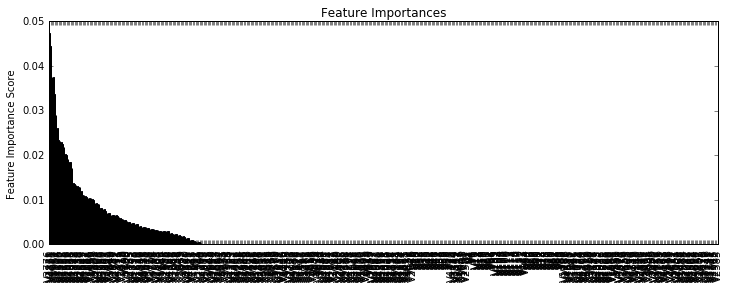

In [77]:
rf1 = RandomForestClassifier(random_state=100,
                             n_estimators=38, max_depth=4, 
                             min_samples_split=50, min_samples_leaf=70, 
                            min_weight_fraction_leaf=0.0, max_features=17, 
                             max_leaf_nodes=None,  bootstrap=True, oob_score=False, n_jobs=1, 
                              verbose=0, warm_start=False, 
                             #class_weight="balanced"
                            )
modelfit(rf1, train,test, predictors) #train 78% test 73%

In [ ]:
#tuned parameter:
#RandomForestClassifier(random_state=100,n_estimators=38, max_depth=4, min_samples_split=50, min_samples_leaf=70, min_weight_fraction_leaf=0.0, max_features=17, 
#max_leaf_nodes=None,  bootstrap=True, oob_score=False, n_jobs=1, verbose=0, warm_start=False)